# **Trabajo**
El objetivo de este trabajo es construir un modelo de regresión lineal y analizar el comportamiento de los datos cuando no se cumplen los supuestos fundamentales del modelo. A través de este análisis, se busca comprender cómo afectan dichas violaciones como la no normalidad de los errores, la heterocedasticidad o la presencia de multicolinealidad al desempeño del modelo, a la validez de las inferencias estadísticas y a la interpretación de los resultados.

#  **Descripción del Dataset**

Data set obtenido de Kaggle: https://www.kaggle.com/datasets/zafarali27/car-price-prediction/data


###  **Objetivo**
Una empresa especializada en compra-venta de automóviles busca construir un modelo de regresión lineal para predecir el **precio** de vehículos en función de sus características técnicas y descriptivas.

###  **Descripción**
El dataset `car_price_prediction` cuenta con **2500 registros** de vehículos y **10 variables** sobre sus características (Car ID, Brand, Year, Engine Size, Fuel Type, Transmission, Mileage, Condition y Model).  
✅ Los datos están completos y **no presentan valores nulos**.






# **Definición de la variable objetivo (Y)**

- **Price**: Variable de tipo flotante que indica el valor estimado del vehículo en dólares.

| Medida  | Valor         |
|---------|---------------|
| Mínimo  | 5,011.27 USD  |
| Máximo  | 99,982.58 USD |
| Media   | 52,638.02 USD |

# **Definición de los features del dataset (variables X)**

Para el modelo de regresión lineal a elaborar encontramos las siguientes variables como las más apropiadas que pueden explicar en una combinación lineal a la variable del Precio.

| Variable       | Tipo        | Descripción |
|----------------|-------------|-------------|
| **Year**       | Numérica    | Año de fabricación del vehículo (2000 - 2023). |
| **Engine Size**| Numérica    | Tamaño del motor en litros. |
| **Mileage**    | Numérica    | Kilometraje recorrido por el vehículo. |
| **Brand**      | Categórica  | Marca del automóvil. |
| **Condition**  | Categórica  | Estado del auto: nuevo, seminuevo o usado. |
| **Model**      | Categórica  | Modelo del vehículo. |
| **Transmission**| Categórica | Tipo de transmisión: automática o manual. |
| **Fuel Type**  | Categórica  | Tipo de combustible: gasolina, diésel, híbrido o eléctrico. |


# **Análisis exploratorio**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
#Dataset obtenido de Kaggle
#Cargamos el dataset
df=pd.read_csv('https://raw.githubusercontent.com/Motsof/Regresion/refs/heads/main/Datos/car_price_prediction.csv')
#Vemos los primeros elementos del dataset
df

Car ID   Brand  Year  Engine Size Fuel Type Transmission  Mileage  \
0          1   Tesla  2016          2.3    Petrol       Manual   114832   
1          2     BMW  2018          4.4  Electric       Manual   143190   
2          3    Audi  2013          4.5  Electric       Manual   181601   
3          4   Tesla  2011          4.1    Diesel    Automatic    68682   
4          5    Ford  2009          2.6    Diesel       Manual   223009   
...      ...     ...   ...          ...       ...          ...      ...   
2495    2496    Audi  2020          2.4    Petrol    Automatic    22650   
2496    2497    Audi  2001          5.7    Hybrid       Manual    77701   
2497    2498    Ford  2021          1.1    Hybrid       Manual   272827   
2498    2499    Audi  2002          4.5    Diesel       Manual   229164   
2499    2500  Toyota  2005          4.6    Diesel    Automatic    80978   

     Condition     Price     Model  
0          New  26613.92   Model X  
1         Used  14679.61  5 Series  
2          New  44402.61        A4  
3          New  86374.33   Model Y  
4     Like New  73577.10   Mustang  
...        ...       ...       ...  
2495  Like New  61384.10        Q5  
2496  Like New  24710.35        A3  
2497  Like New  29902.45    Fiesta  
2498  Like New  46085.67        Q5  
2499      Used  16594.14      RAV4  

[2500 rows x 10 columns]

In [3]:
#Cambio de index por el de la columna Car ID
df.set_index('Car ID', inplace=True)

In [4]:
#Mostramos los primeros 5 valores de df
df.head()

Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
Car ID                                                                       
1       Tesla  2016          2.3    Petrol       Manual   114832       New   
2         BMW  2018          4.4  Electric       Manual   143190      Used   
3        Audi  2013          4.5  Electric       Manual   181601       New   
4       Tesla  2011          4.1    Diesel    Automatic    68682       New   
5        Ford  2009          2.6    Diesel       Manual   223009  Like New   

           Price     Model  
Car ID                      
1       26613.92   Model X  
2       14679.61  5 Series  
3       44402.61        A4  
4       86374.33   Model Y  
5       73577.10   Mustang

In [5]:
# Solicitamos la información sobre que tipo de variable son los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1 to 2500
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         2500 non-null   object 
 1   Year          2500 non-null   int64  
 2   Engine Size   2500 non-null   float64
 3   Fuel Type     2500 non-null   object 
 4   Transmission  2500 non-null   object 
 5   Mileage       2500 non-null   int64  
 6   Condition     2500 non-null   object 
 7   Price         2500 non-null   float64
 8   Model         2500 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 195.3+ KB


In [6]:
# Notamos que algunas variables son de tipo objeto, procederemos a cambiarlas por tipo categoría
# Creamos una varible que contenga todas las columnas tipo object
object_cols = df.select_dtypes(include='object').columns

# Convertimos cada columna object a category
for col in object_cols:
    df[col] = df[col].astype('category')

#Verificacion del tipo de varible
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1 to 2500
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Brand         2500 non-null   category
 1   Year          2500 non-null   int64   
 2   Engine Size   2500 non-null   float64 
 3   Fuel Type     2500 non-null   category
 4   Transmission  2500 non-null   category
 5   Mileage       2500 non-null   int64   
 6   Condition     2500 non-null   category
 7   Price         2500 non-null   float64 
 8   Model         2500 non-null   category
dtypes: category(5), float64(2), int64(2)
memory usage: 111.9 KB


## Análisis de nulos

In [7]:
# Observamos si las variables cuentan con datos nulos
df.isna().sum()

Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [8]:
# Buscamos que no haya filas duplicadas
print(f'Hay {df.duplicated().sum()} filas duplicadas')

Hay 0 filas duplicadas


In [9]:
#Mostramos las estadisitcas descriptivas de cada columna
df.describe().round( )

Year  Engine Size   Mileage    Price
count  2500.0       2500.0    2500.0   2500.0
mean   2012.0          3.0  149750.0  52638.0
std       7.0          1.0   87920.0  27296.0
min    2000.0          1.0      15.0   5011.0
25%    2005.0          2.0   71832.0  28908.0
50%    2012.0          3.0  149085.0  53485.0
75%    2018.0          5.0  225990.0  75839.0
max    2023.0          6.0  299967.0  99983.0

## Distribuciones de las variables numericas


In [10]:
# Lista de las variables numericas del df
numerico = df.select_dtypes(include='number').columns
numerico

Index(['Year', 'Engine Size', 'Mileage', 'Price'], dtype='object')

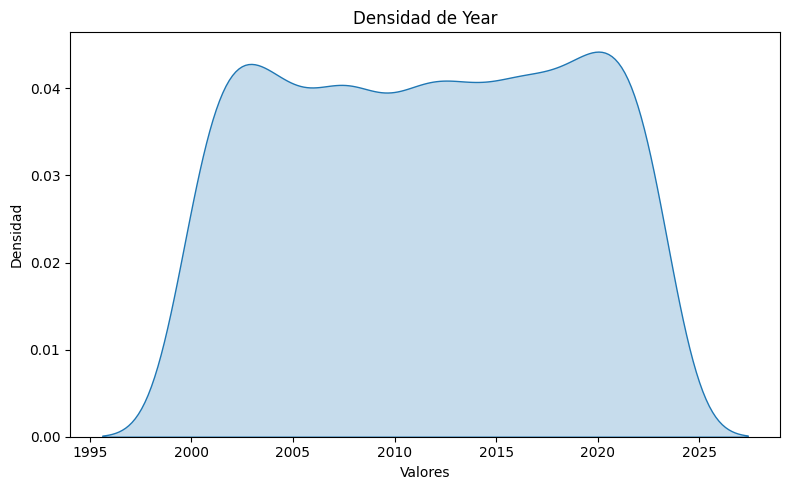

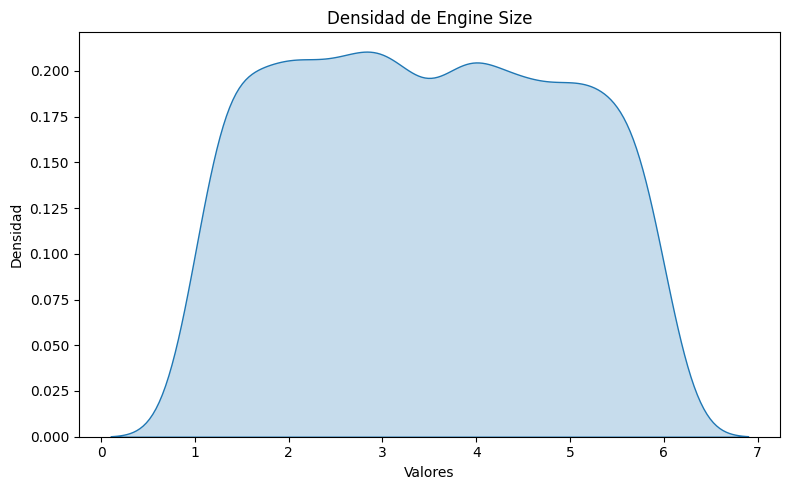

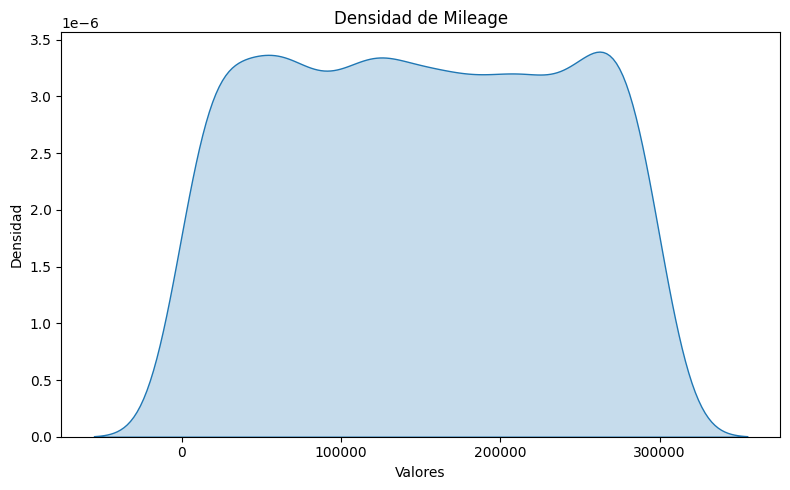

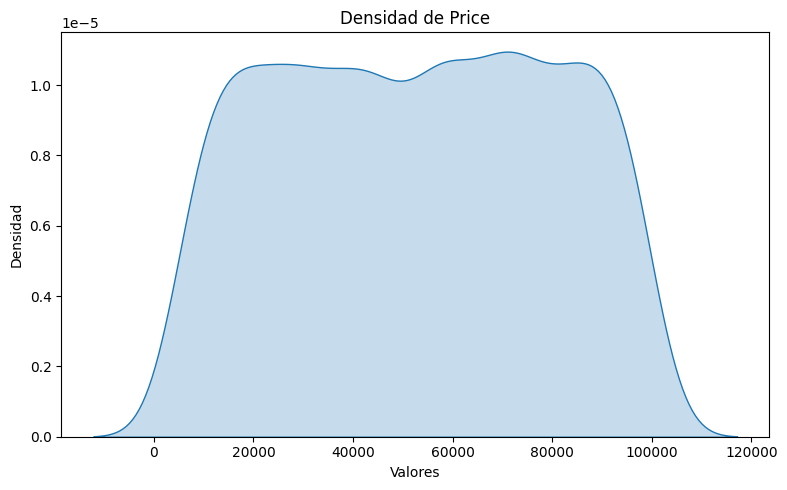

In [11]:
#Grafico de la densidad de todas las varibles numericas
for col in numerico:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(x=df[col],fill=True)
    plt.title(f'Densidad de {col}')
    plt.xlabel("Valores")
    plt.ylabel("Densidad")
    plt.tight_layout()
    plt.show()


## Análisis de las columnas

In [12]:
# Creamos una lista sobre las columnas del dataset para facilitar su manejo
col = df.columns
col

Index(['Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission', 'Mileage',
       'Condition', 'Price', 'Model'],
      dtype='object')

In [13]:
#Conteo de los datos
for c in col:
    print(f'---------Valores unicos de {c}---------')
    print(df[c].value_counts())
    print('\n')

---------Valores unicos de Brand---------
Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64


---------Valores unicos de Year---------
Year
2020    122
2016    118
2003    118
2022    112
2021    112
2012    111
2007    110
2002    110
2008    109
2014    109
2001    109
2018    106
2019    103
2023    103
2005    103
2011    101
2004    100
2017     97
2010     95
2013     95
2000     93
2009     90
2015     88
2006     86
Name: count, dtype: int64


---------Valores unicos de Engine Size---------
Engine Size
1.3    69
3.9    65
3.0    61
2.7    60
1.8    60
4.0    57
5.1    57
2.2    56
4.4    56
4.5    56
3.1    56
4.8    56
1.4    54
2.1    54
5.7    53
2.6    53
5.0    53
2.9    52
5.8    52
3.4    52
2.0    51
2.4    51
3.7    51
5.4    51
3.8    50
4.7    50
3.2    50
5.2    49
4.2    49
1.9    49
1.7    48
2.5    48
1.2    48
2.8    46
2.3    46
4.1    45
3.3    45
5.3    44
5.5    44


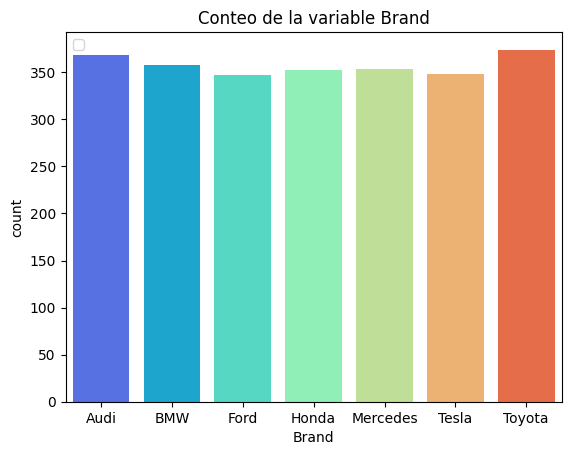

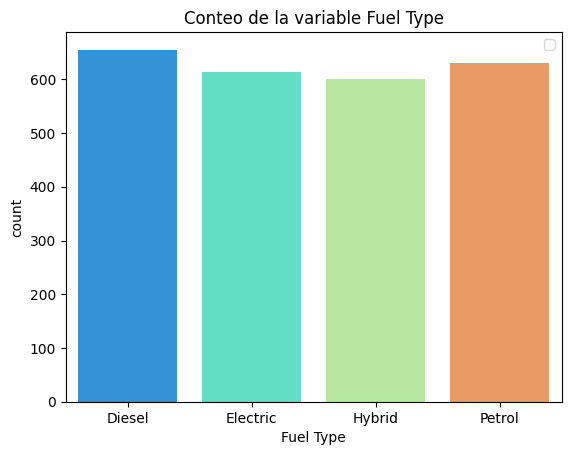

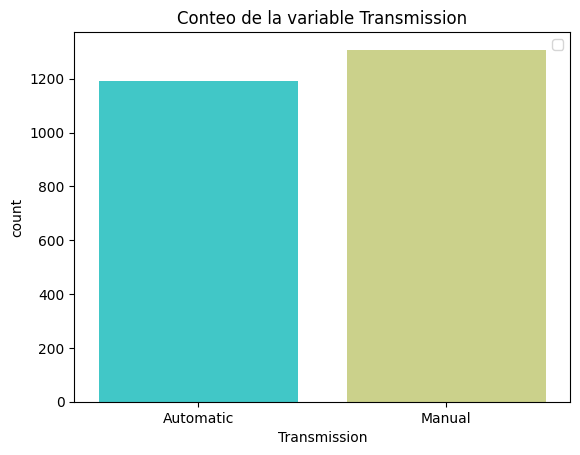

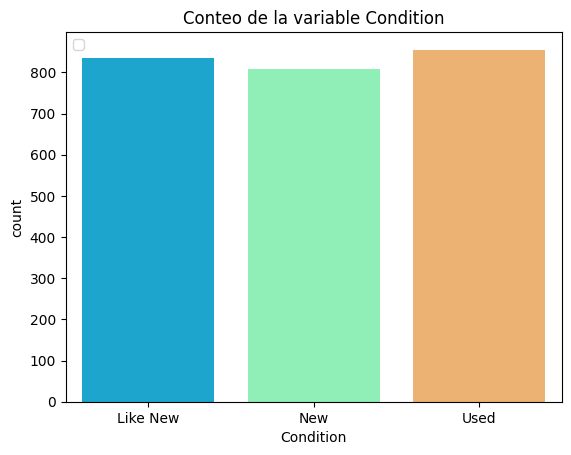

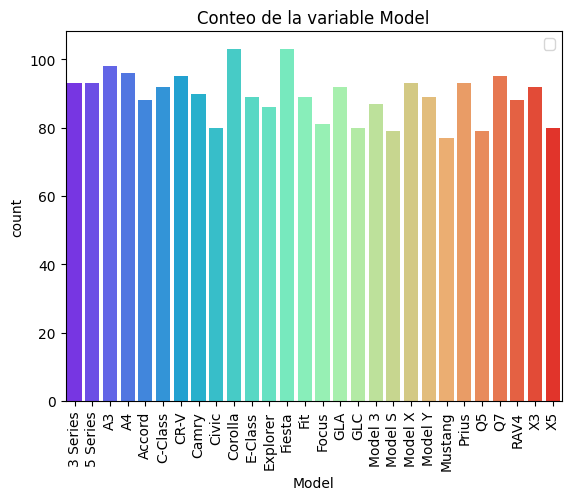

In [14]:
#Gráficas sobre las columnas
for c in col:
    if c in ['Mileage','Price']:
      continue
    if df[c].dtype.name == 'category':
      sns.countplot(data= df, x=c, palette='rainbow', hue=c)
      plt.title("Conteo de la variable " + c)
      plt.legend([], [])
      if c in ['Year','Engine Size','Model']:
        plt.xticks(rotation=90)
    plt.show()

In [15]:
# Creamos una lista de las variabales que son de tipo categoría para ayudarnos a graficar

categorias = df.select_dtypes(include='category').columns
categorias

Index(['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'], dtype='object')

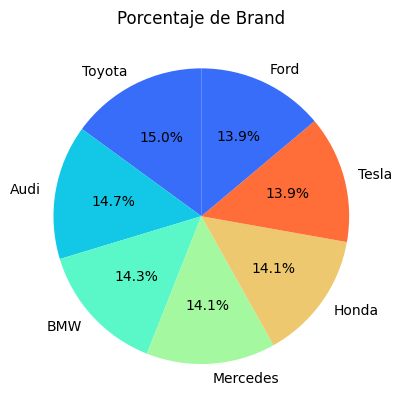

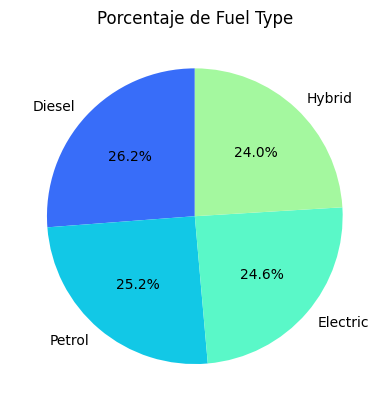

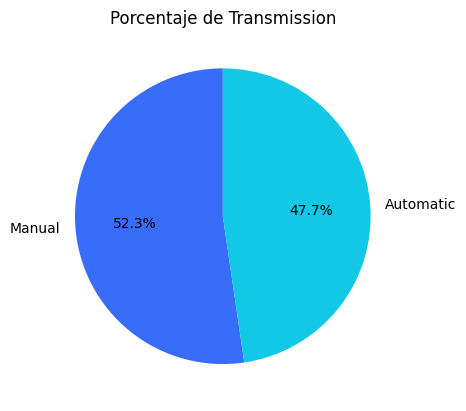

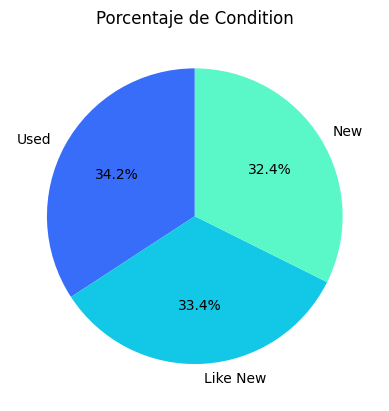

In [16]:
# Grafico de pastel para visualizar la proporcion de categorías dentro de la variable de tipo categoría

for c in categorias:
    if c == "Model":
         continue
    datos = df[c].value_counts().reset_index()
    datos.columns = ['Categoria', 'Count']
    plt.pie(x=datos['Count'], labels=datos['Categoria'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('rainbow'))
    plt.title(f"Porcentaje de {c}")
    plt.show()

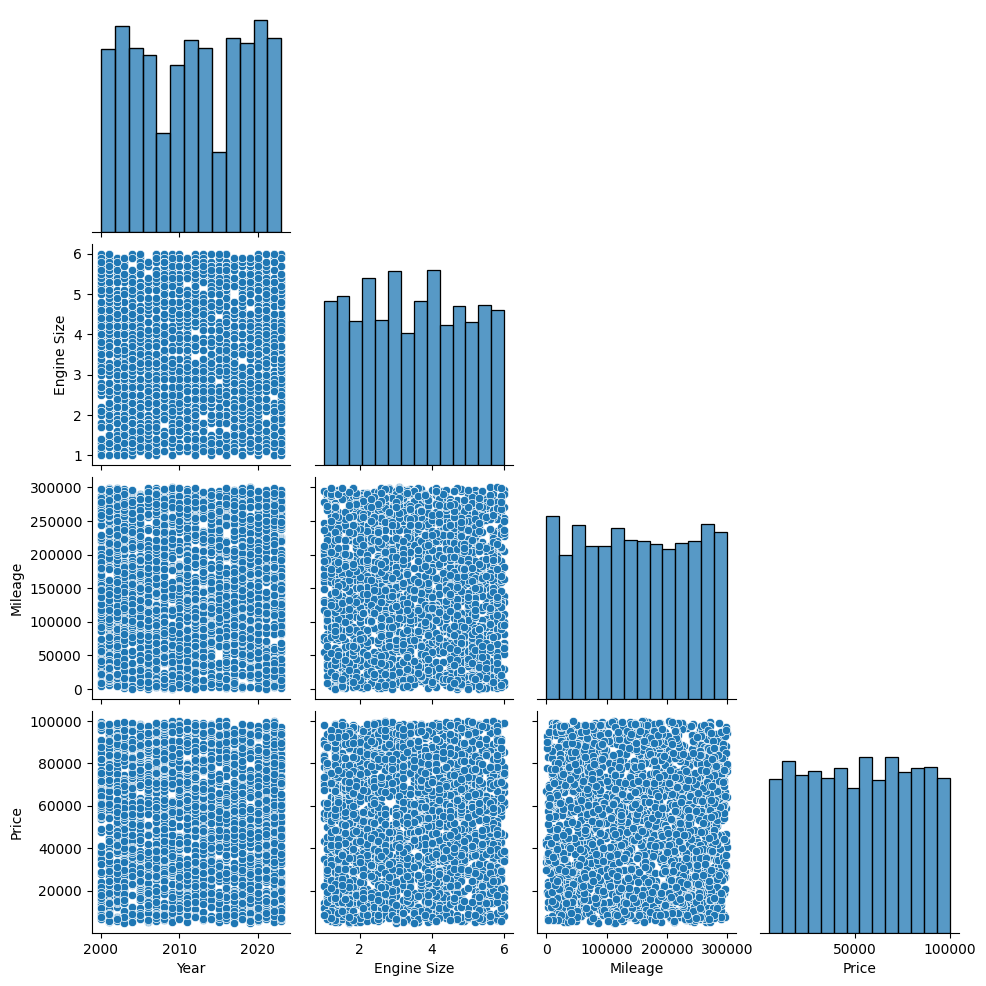

In [17]:
# Generamos varios graficos que combinan todas las varibles numericas

sns.pairplot(df,corner=True)
plt.show()

### Análisis del precio promedio respecto a las categorías

In [18]:
# Obtenemos el precio promedio por marca de auto
# Se observa que los precios de los carros se encuentran en un intervalo de entre los 51,000 USD y 54,000 USD

brand_price = df.groupby("Brand", observed=False)["Price"].mean()
brand_price.round(2)


Brand
Audi        51953.42
BMW         54157.11
Ford        51593.25
Honda       52050.28
Mercedes    53191.09
Tesla       53475.55
Toyota      52078.73
Name: Price, dtype: float64

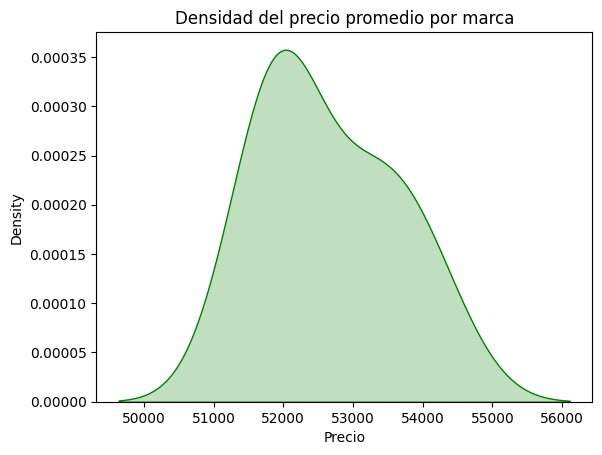

In [19]:
# Graficamos de la densidad de los precios promedio por marca

sns.kdeplot(brand_price, color='green',fill=True)
plt.title('Densidad del precio promedio por marca')
plt.xlabel('Precio')
plt.show()


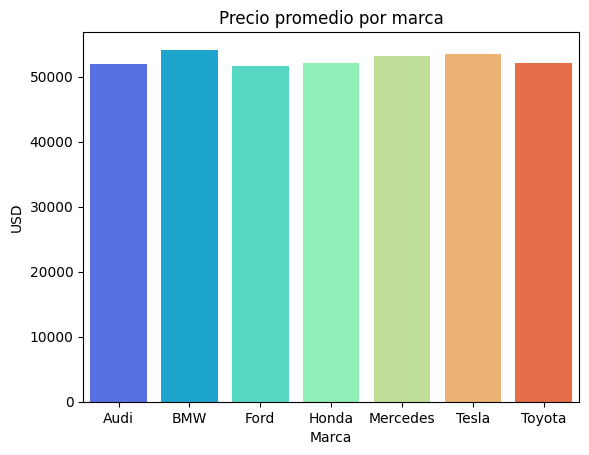

In [20]:
# Grafico del precio promedio por marca

sns.barplot(data = brand_price.reset_index(), x='Brand', y='Price', palette='rainbow', hue='Brand')
plt.title('Precio promedio por marca')
plt.xlabel('Marca')
plt.ylabel('USD')
plt.show()

In [21]:
# Obtenemos el precio promedio por año

year_price = df.groupby('Year')['Price'].mean().round(2)
year_price

Year
2000    53094.16
2001    48944.06
2002    57197.48
2003    52260.19
2004    51517.98
2005    57534.32
2006    53437.60
2007    56464.20
2008    53104.79
2009    52932.74
2010    53650.24
2011    51414.87
2012    57092.14
2013    52495.03
2014    54202.58
2015    51516.46
2016    51977.46
2017    49045.69
2018    52640.95
2019    49848.34
2020    48281.74
2021    48819.72
2022    54656.14
2023    51328.69
Name: Price, dtype: float64

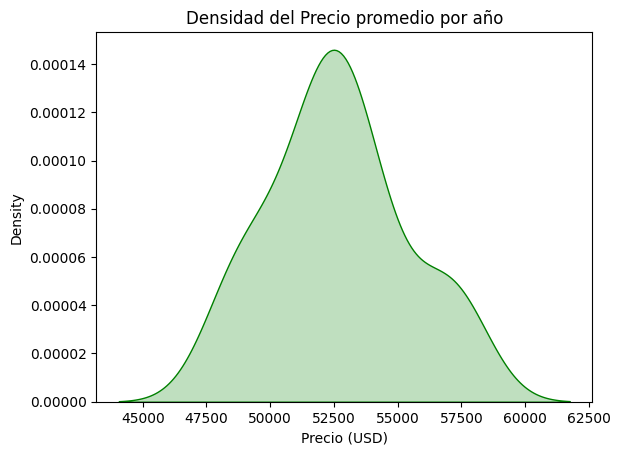

In [22]:
# Graficamos los precios promedio por año

sns.kdeplot(year_price, color='g',fill=True)
plt.title('Densidad del Precio promedio por año')
plt.xlabel('Precio (USD)')
plt.show()


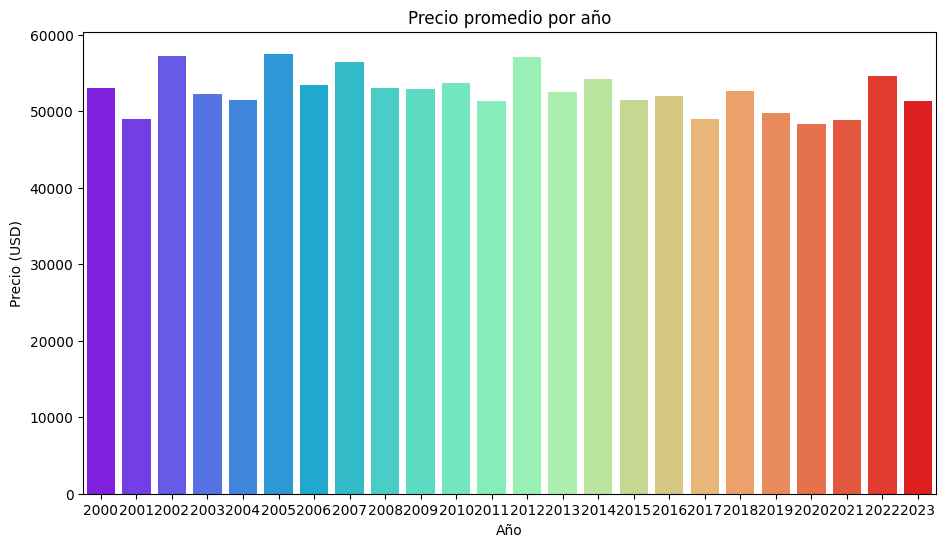

In [23]:
# Grafico de barras del precio promedio por año

plt.figure(figsize=(11, 6))
sns.barplot(data = year_price.reset_index(), x='Year', y='Price', palette='rainbow',hue='Year',legend=False)
plt.title('Precio promedio por año')
plt.xlabel('Año')
plt.ylabel('Precio (USD)')
plt.show()

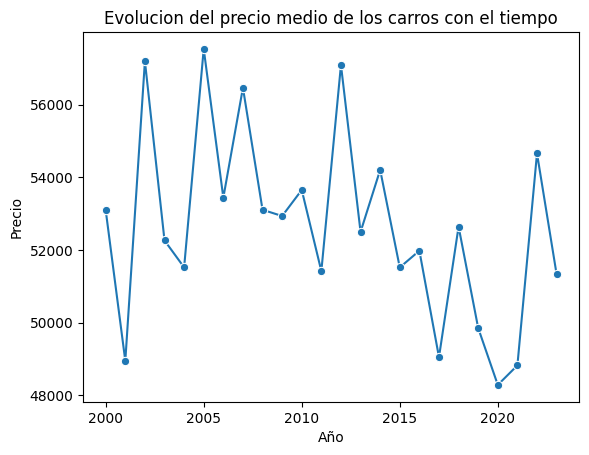

In [24]:
# Grafico de Linea para mostrar la evolucion del precio

sns.lineplot(x="Year",y="Price",data=df, marker='o',errorbar=None)
plt.title('Evolucion del precio medio de los carros con el tiempo')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

In [25]:
# Obtendremos el precio promedio anual por marca de auto

df.groupby(['Brand','Year'], observed=False)['Price'].mean().round(2)

Brand   Year
Audi    2000    62248.97
        2001    49257.66
        2002    58023.82
        2003    51433.73
        2004    57398.37
                  ...   
Toyota  2019    40044.98
        2020    55661.00
        2021    54720.42
        2022    43301.69
        2023    57699.95
Name: Price, Length: 168, dtype: float64

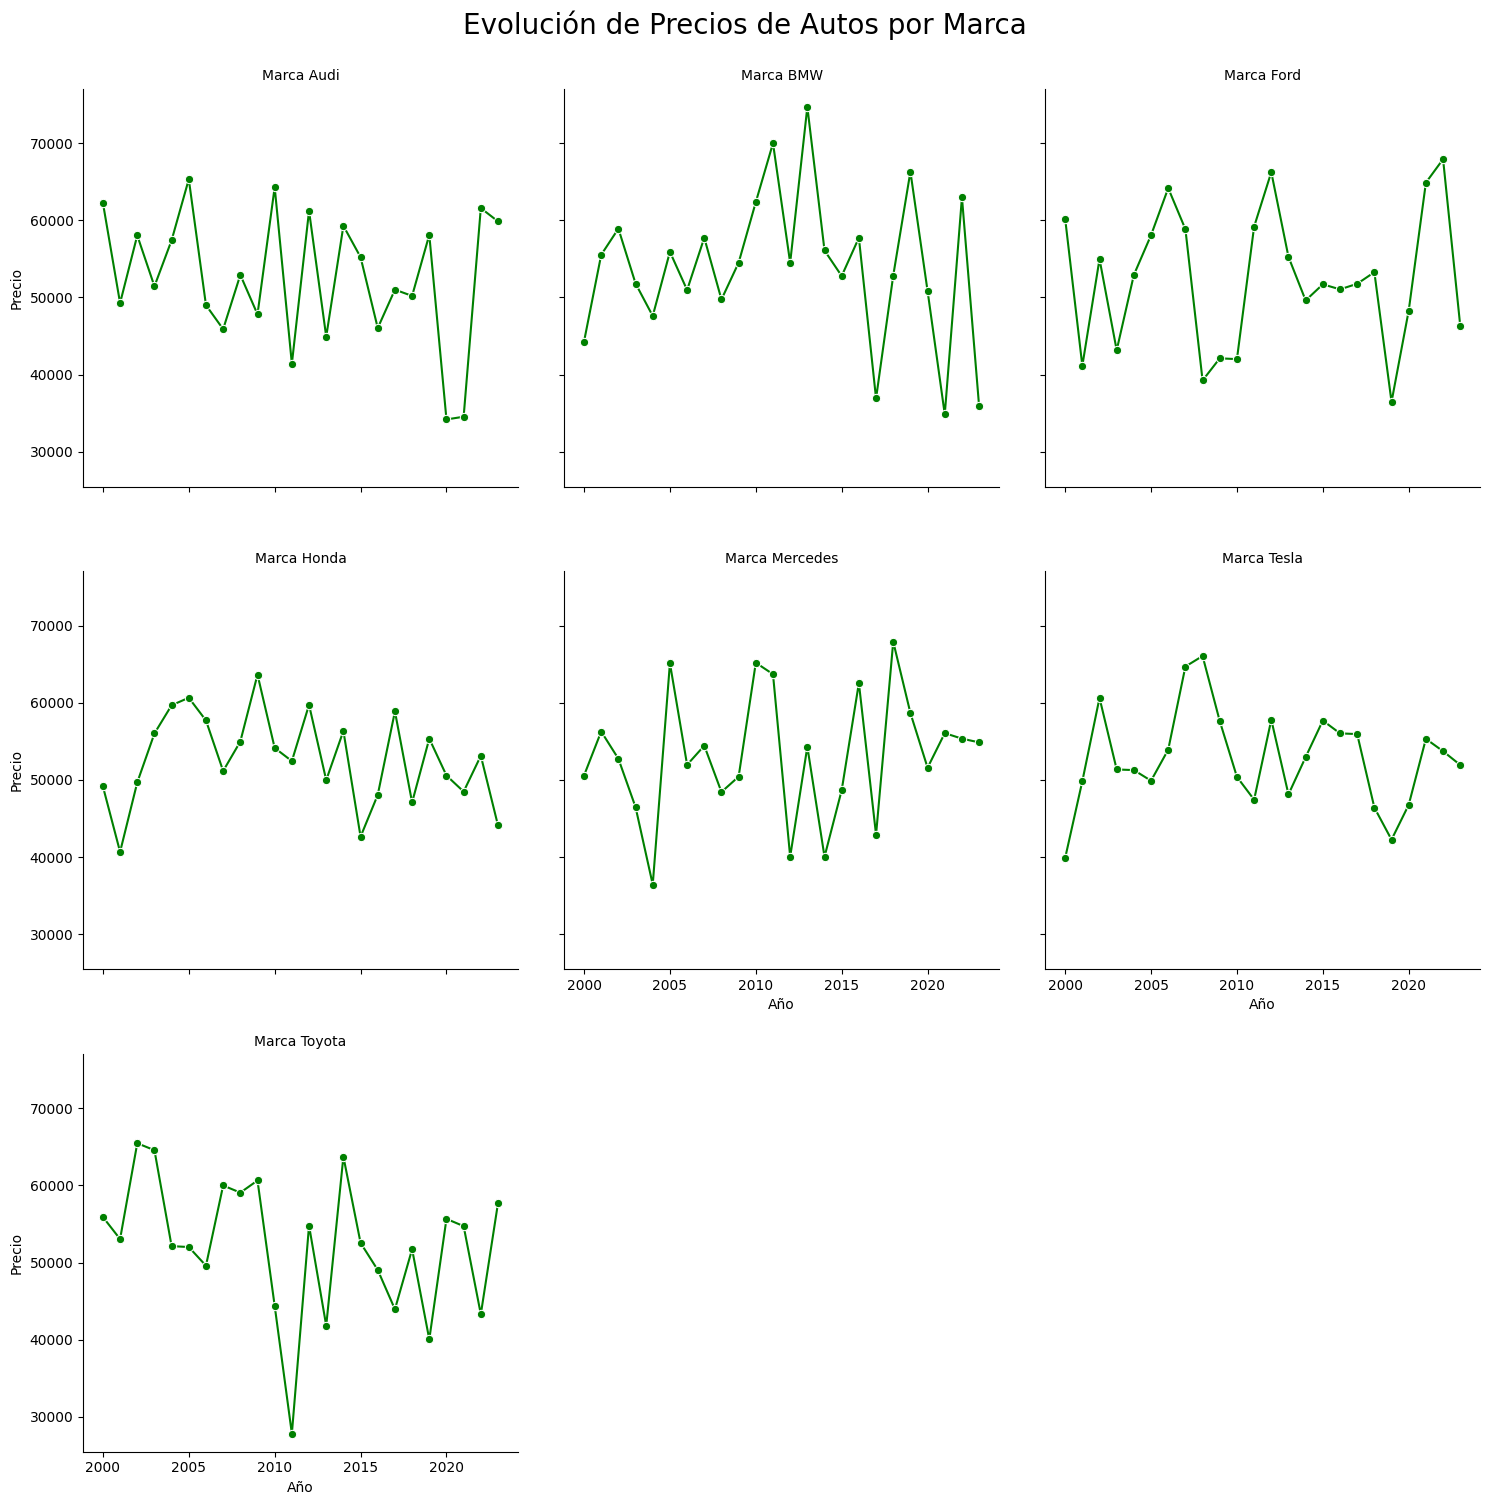

In [26]:
# Graficas que muestran la evolucion del precio de cada Marca

g = sns.relplot(data = df, x = 'Year', y='Price', kind='line', col='Brand', col_wrap=3, marker='o', color='g', errorbar=None)
g.figure.suptitle('Evolución de Precios de Autos por Marca', fontsize=20, y=1)
g.set_axis_labels("Año", "Precio")
g.set_titles("Marca {col_name}")
g.figure.tight_layout(h_pad=3, w_pad=3)
plt.show()

In [27]:
# Precio promedio de los modelos por cada año

df_agrupado=df.groupby(['Model','Year'], observed=False)['Price'].mean().round(2)
df_agrupado

Model     Year
3 Series  2000    67645.00
          2001    14281.89
          2002    59737.66
          2003    54858.22
          2004    29921.44
                    ...   
X5        2019    60112.85
          2020    73569.03
          2021    49497.66
          2022     8268.34
          2023     5741.64
Name: Price, Length: 672, dtype: float64

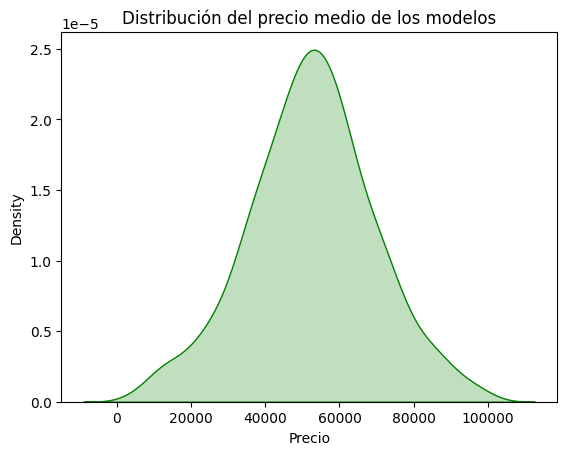

In [28]:
#Distribución del precio medio de los modelos
sns.kdeplot(data=df_agrupado.reset_index(), x='Price', fill=True, color='g')
plt.title('Distribución del precio medio de los modelos')
plt.xlabel('Precio')
plt.show()

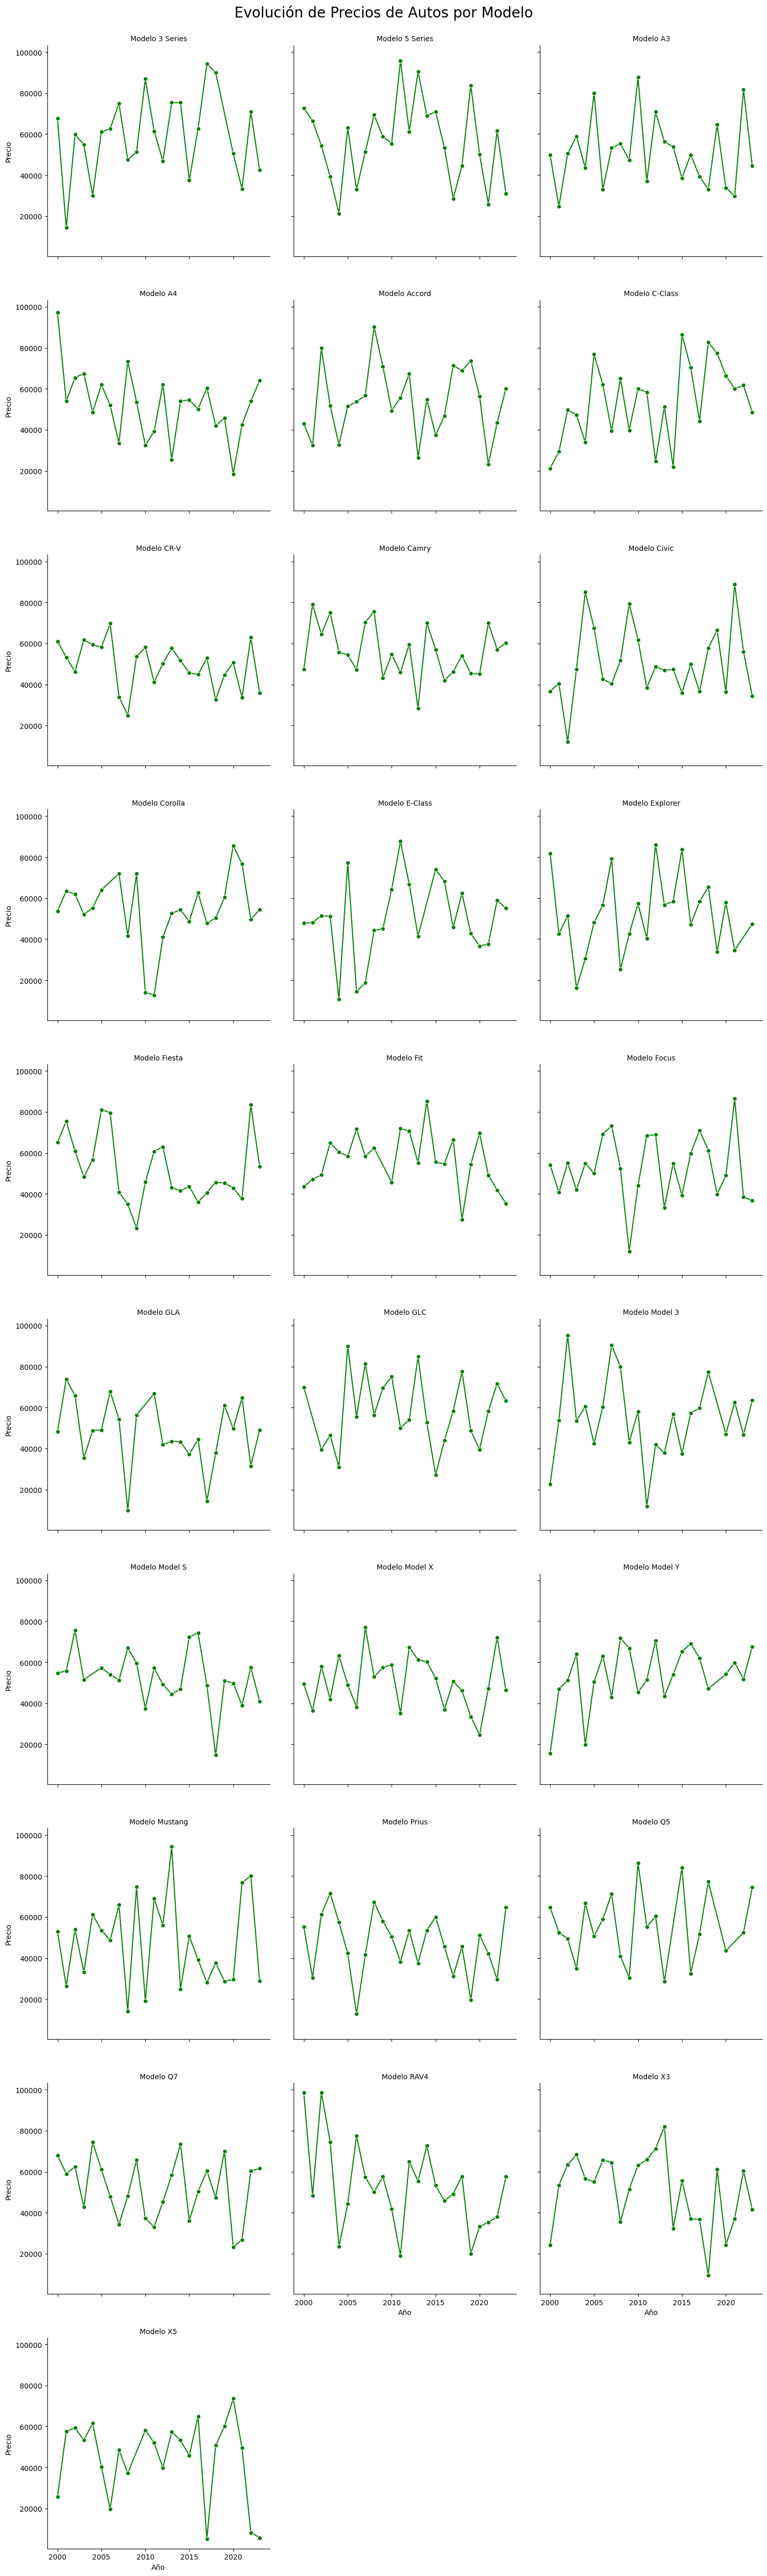

In [29]:
# Graficas que muestran la evolucion del precio de cada Modelo

g=sns.relplot(data=df, x = 'Year', y = 'Price', kind = 'line', col = 'Model', col_wrap=3, marker='o', color='g', errorbar=None)
g.figure.suptitle('Evolución de Precios de Autos por Modelo', fontsize=20, y=1)
g.set_axis_labels("Año", "Precio")
g.set_titles("Modelo {col_name}")
g.figure.tight_layout(h_pad=3, w_pad=3)
plt.show()

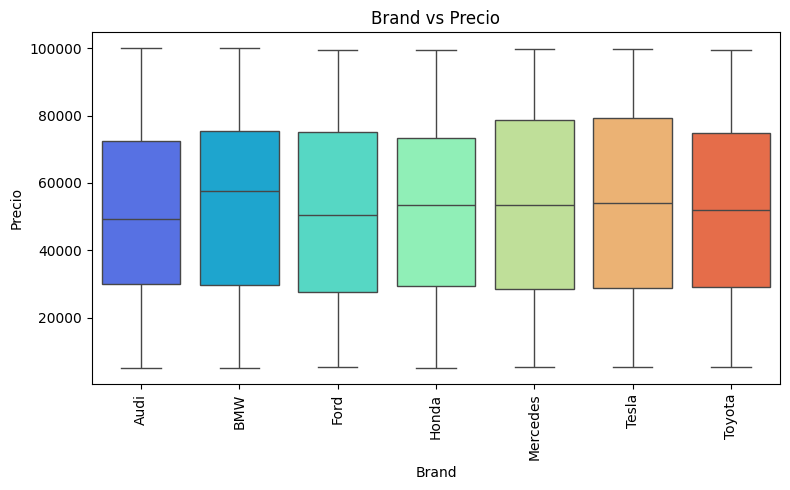

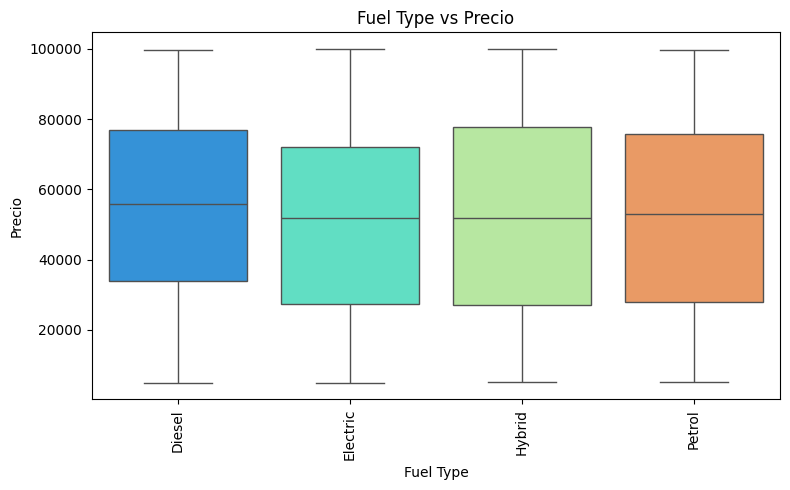

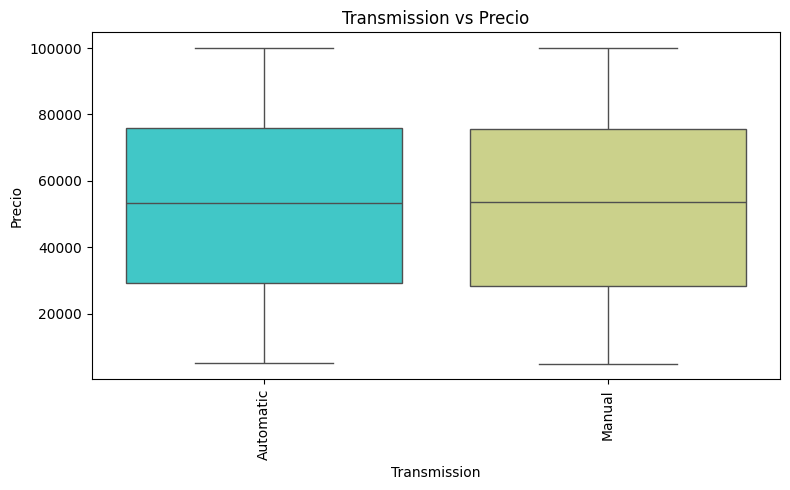

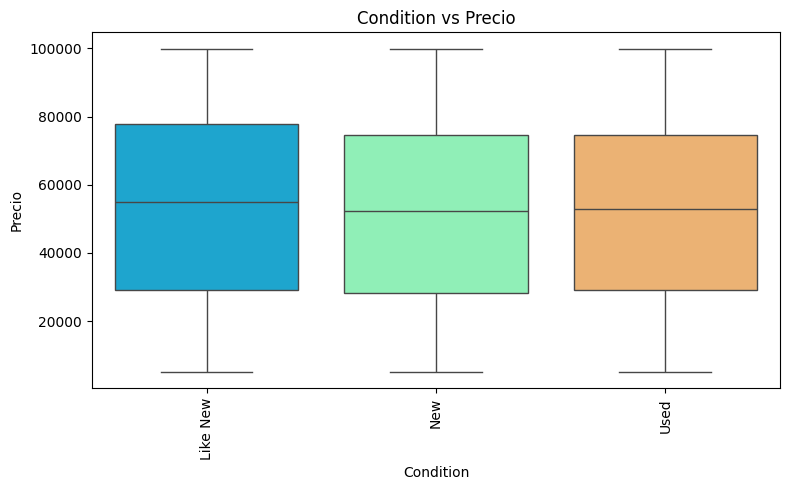

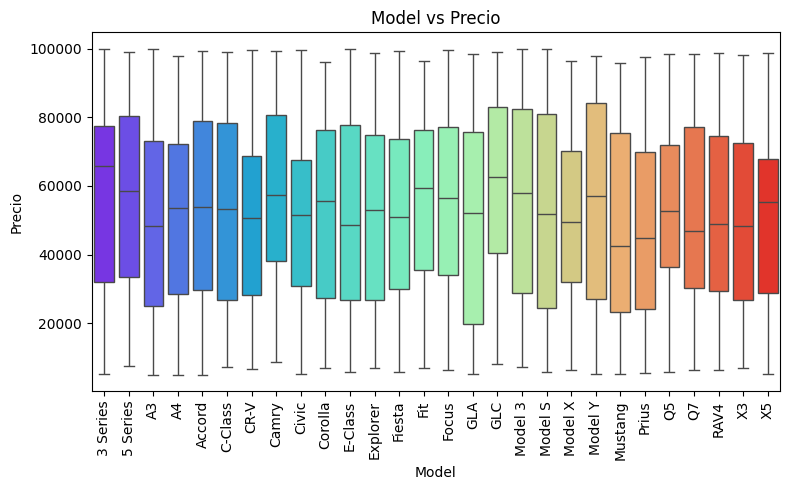

In [30]:
# Graficos de boxplot para observar si hay outliers en las categorias respecto al precio

for col in categorias:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='Price', data=df, palette='rainbow', hue=col)
    plt.title(f'{col} vs Precio')
    plt.xticks(rotation=90)
    plt.ylabel('Precio')
    plt.tight_layout()
    plt.show()

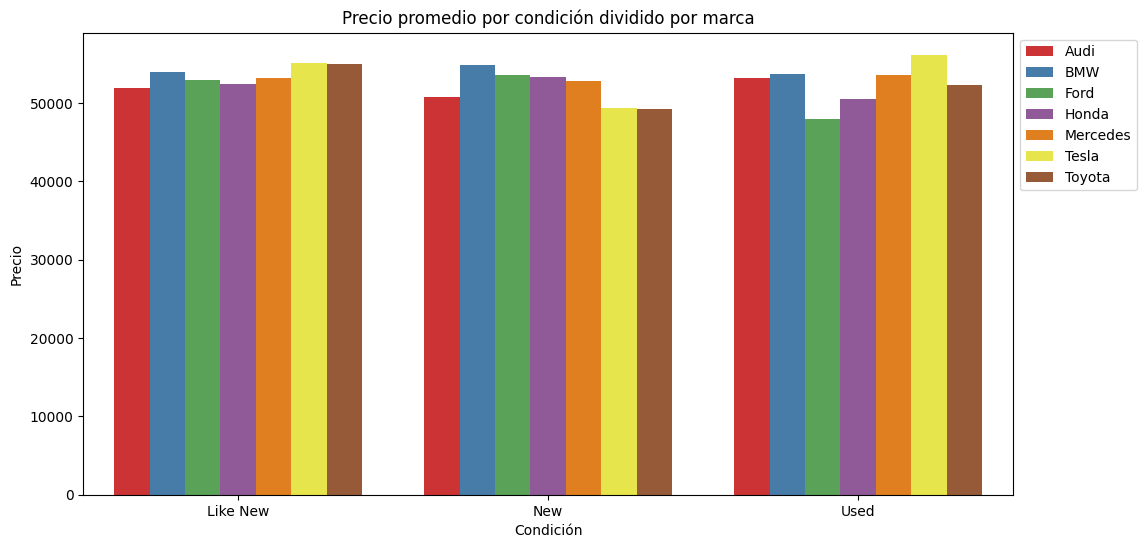

In [31]:
#df agrupado porcondicion y modelo, para sacar el precio medio
cond_pre=df.groupby(['Condition','Brand'],observed=False )['Price'].mean()
#Grafico del precio por condicion y dividido p0r marca
plt.figure(figsize=(12, 6))
sns.barplot(data=cond_pre.reset_index(), x='Condition', y='Price', hue='Brand', palette='Set1')
plt.title('Precio promedio por condición dividido por marca')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Condición')
plt.ylabel('Precio')
plt.show()

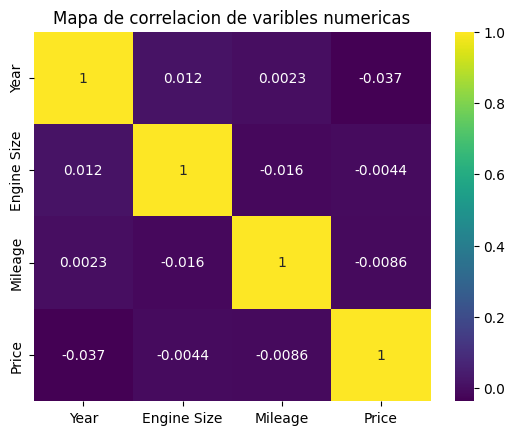

In [32]:
# Mapa de correlacion sin las varibles categoricas (solo numericas)

sns.heatmap(df[numerico].corr(), cmap='viridis', annot=True)
plt.title('Mapa de correlacion de varibles numericas')
plt.show()

#Tratamiento de varibles categoricas

En esta parte obtendremos las dummies a partir de las varibles categoricas para agregarlas de inicio a nuestro dataset.

In [33]:
# Vamos a hacer una copia del dataframe para no trabajar directamente sobre el original

df2 = df.copy()

In [34]:
# Convertimos la varible categorica Condition a numerica por ser de caracter ordinal

condition_dict = {'New':1, 'Used':3, 'Like New':2}
df2['Condition'] = df2['Condition'].map(condition_dict)
df2

Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
Car ID                                                                        
1        Tesla  2016          2.3    Petrol       Manual   114832         1   
2          BMW  2018          4.4  Electric       Manual   143190         3   
3         Audi  2013          4.5  Electric       Manual   181601         1   
4        Tesla  2011          4.1    Diesel    Automatic    68682         1   
5         Ford  2009          2.6    Diesel       Manual   223009         2   
...        ...   ...          ...       ...          ...      ...       ...   
2496      Audi  2020          2.4    Petrol    Automatic    22650         2   
2497      Audi  2001          5.7    Hybrid       Manual    77701         2   
2498      Ford  2021          1.1    Hybrid       Manual   272827         2   
2499      Audi  2002          4.5    Diesel       Manual   229164         2   
2500    Toyota  2005          4.6    Diesel    Automatic    80978         3   

           Price     Model  
Car ID                      
1       26613.92   Model X  
2       14679.61  5 Series  
3       44402.61        A4  
4       86374.33   Model Y  
5       73577.10   Mustang  
...          ...       ...  
2496    61384.10        Q5  
2497    24710.35        A3  
2498    29902.45    Fiesta  
2499    46085.67        Q5  
2500    16594.14      RAV4  

[2500 rows x 9 columns]

In [35]:
# Convertimos la varible Year por antiguedad/vida del carro para un mejor manejo en el modelo

df2['Car Age'] = 2023 - df2['Year']
df2.drop('Year', axis = 1, inplace = True)
df2.head()

Brand  Engine Size Fuel Type Transmission  Mileage Condition  \
Car ID                                                                 
1       Tesla          2.3    Petrol       Manual   114832         1   
2         BMW          4.4  Electric       Manual   143190         3   
3        Audi          4.5  Electric       Manual   181601         1   
4       Tesla          4.1    Diesel    Automatic    68682         1   
5        Ford          2.6    Diesel       Manual   223009         2   

           Price     Model  Car Age  
Car ID                               
1       26613.92   Model X        7  
2       14679.61  5 Series        5  
3       44402.61        A4       10  
4       86374.33   Model Y       12  
5       73577.10   Mustang       14

In [36]:
# Obtenemos las dummies para las varibles categoricas identificadas como nominales

df2 = pd.get_dummies(df2, columns = categorias.drop('Condition'), drop_first = True)
df2

Engine Size  Mileage Condition     Price  Car Age  Brand_BMW  \
Car ID                                                                 
1               2.3   114832         1  26613.92        7      False   
2               4.4   143190         3  14679.61        5       True   
3               4.5   181601         1  44402.61       10      False   
4               4.1    68682         1  86374.33       12      False   
5               2.6   223009         2  73577.10       14      False   
...             ...      ...       ...       ...      ...        ...   
2496            2.4    22650         2  61384.10        3      False   
2497            5.7    77701         2  24710.35       22      False   
2498            1.1   272827         2  29902.45        2      False   
2499            4.5   229164         2  46085.67       21      False   
2500            4.6    80978         3  16594.14       18      False   

        Brand_Ford  Brand_Honda  Brand_Mercedes  Brand_Tesla  ...  \
Car ID                                                        ...   
1            False        False           False         True  ...   
2            False        False           False        False  ...   
3            False        False           False        False  ...   
4            False        False           False         True  ...   
5             True        False           False        False  ...   
...            ...          ...             ...          ...  ...   
2496         False        False           False        False  ...   
2497         False        False           False        False  ...   
2498          True        False           False        False  ...   
2499         False        False           False        False  ...   
2500         False        False           False        False  ...   

        Model_Model S  Model_Model X  Model_Model Y  Model_Mustang  \
Car ID                                                               
1               False           True          False          False   
2               False          False          False          False   
3               False          False          False          False   
4               False          False           True          False   
5               False          False          False           True   
...               ...            ...            ...            ...   
2496            False          False          False          False   
2497            False          False          False          False   
2498            False          False          False          False   
2499            False          False          False          False   
2500            False          False          False          False   

        Model_Prius  Model_Q5  Model_Q7  Model_RAV4  Model_X3  Model_X5  
Car ID                                                                   
1             False     False     False       False     False     False  
2             False     False     False       False     False     False  
3             False     False     False       False     False     False  
4             False     False     False       False     False     False  
5             False     False     False       False     False     False  
...             ...       ...       ...         ...       ...       ...  
2496          False      True     False       False     False     False  
2497          False     False     False       False     False     False  
2498          False     False     False       False     False     False  
2499          False      True     False       False     False     False  
2500          False     False     False        True     False     False  

[2500 rows x 42 columns]

In [37]:
# Verficamos que tipo de dato son las dummies

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1 to 2500
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Engine Size          2500 non-null   float64 
 1   Mileage              2500 non-null   int64   
 2   Condition            2500 non-null   category
 3   Price                2500 non-null   float64 
 4   Car Age              2500 non-null   int64   
 5   Brand_BMW            2500 non-null   bool    
 6   Brand_Ford           2500 non-null   bool    
 7   Brand_Honda          2500 non-null   bool    
 8   Brand_Mercedes       2500 non-null   bool    
 9   Brand_Tesla          2500 non-null   bool    
 10  Brand_Toyota         2500 non-null   bool    
 11  Fuel Type_Electric   2500 non-null   bool    
 12  Fuel Type_Hybrid     2500 non-null   bool    
 13  Fuel Type_Petrol     2500 non-null   bool    
 14  Transmission_Manual  2500 non-null   bool    
 15  Model_5 Series       2500 

In [38]:
# Seleccion de las columnas bool

bool_cols = df2.select_dtypes(include='bool').columns

# Convertimos cada columna bool a int64

for col in bool_cols:
    df2[col] = df2[col].astype('int64')

In [39]:
# Verificamos si hizo el cambio de bool a int64 correctamente

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1 to 2500
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Engine Size          2500 non-null   float64 
 1   Mileage              2500 non-null   int64   
 2   Condition            2500 non-null   category
 3   Price                2500 non-null   float64 
 4   Car Age              2500 non-null   int64   
 5   Brand_BMW            2500 non-null   int64   
 6   Brand_Ford           2500 non-null   int64   
 7   Brand_Honda          2500 non-null   int64   
 8   Brand_Mercedes       2500 non-null   int64   
 9   Brand_Tesla          2500 non-null   int64   
 10  Brand_Toyota         2500 non-null   int64   
 11  Fuel Type_Electric   2500 non-null   int64   
 12  Fuel Type_Hybrid     2500 non-null   int64   
 13  Fuel Type_Petrol     2500 non-null   int64   
 14  Transmission_Manual  2500 non-null   int64   
 15  Model_5 Series       2500 

In [40]:
#Damos un mejor formato a las columnas
df2.columns = df2.columns.str.replace(' ','_')
df2.columns = df2.columns.str.replace('-','_')
df2.head()

Engine_Size  Mileage Condition     Price  Car_Age  Brand_BMW  \
Car ID                                                                 
1               2.3   114832         1  26613.92        7          0   
2               4.4   143190         3  14679.61        5          1   
3               4.5   181601         1  44402.61       10          0   
4               4.1    68682         1  86374.33       12          0   
5               2.6   223009         2  73577.10       14          0   

        Brand_Ford  Brand_Honda  Brand_Mercedes  Brand_Tesla  ...  \
Car ID                                                        ...   
1                0            0               0            1  ...   
2                0            0               0            0  ...   
3                0            0               0            0  ...   
4                0            0               0            1  ...   
5                1            0               0            0  ...   

        Model_Model_S  Model_Model_X  Model_Model_Y  Model_Mustang  \
Car ID                                                               
1                   0              1              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              1              0   
5                   0              0              0              1   

        Model_Prius  Model_Q5  Model_Q7  Model_RAV4  Model_X3  Model_X5  
Car ID                                                                   
1                 0         0         0           0         0         0  
2                 0         0         0           0         0         0  
3                 0         0         0           0         0         0  
4                 0         0         0           0         0         0  
5                 0         0         0           0         0         0  

[5 rows x 42 columns]

In [41]:
#Reubicamos la columna de 'Price' al inicio de nuestra tabla

df2 = df2[['Price'] + [col for col in df2.columns if col != 'Price']]
df2.head()

Price  Engine_Size  Mileage Condition  Car_Age  Brand_BMW  \
Car ID                                                                 
1       26613.92          2.3   114832         1        7          0   
2       14679.61          4.4   143190         3        5          1   
3       44402.61          4.5   181601         1       10          0   
4       86374.33          4.1    68682         1       12          0   
5       73577.10          2.6   223009         2       14          0   

        Brand_Ford  Brand_Honda  Brand_Mercedes  Brand_Tesla  ...  \
Car ID                                                        ...   
1                0            0               0            1  ...   
2                0            0               0            0  ...   
3                0            0               0            0  ...   
4                0            0               0            1  ...   
5                1            0               0            0  ...   

        Model_Model_S  Model_Model_X  Model_Model_Y  Model_Mustang  \
Car ID                                                               
1                   0              1              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              1              0   
5                   0              0              0              1   

        Model_Prius  Model_Q5  Model_Q7  Model_RAV4  Model_X3  Model_X5  
Car ID                                                                   
1                 0         0         0           0         0         0  
2                 0         0         0           0         0         0  
3                 0         0         0           0         0         0  
4                 0         0         0           0         0         0  
5                 0         0         0           0         0         0  

[5 rows x 42 columns]

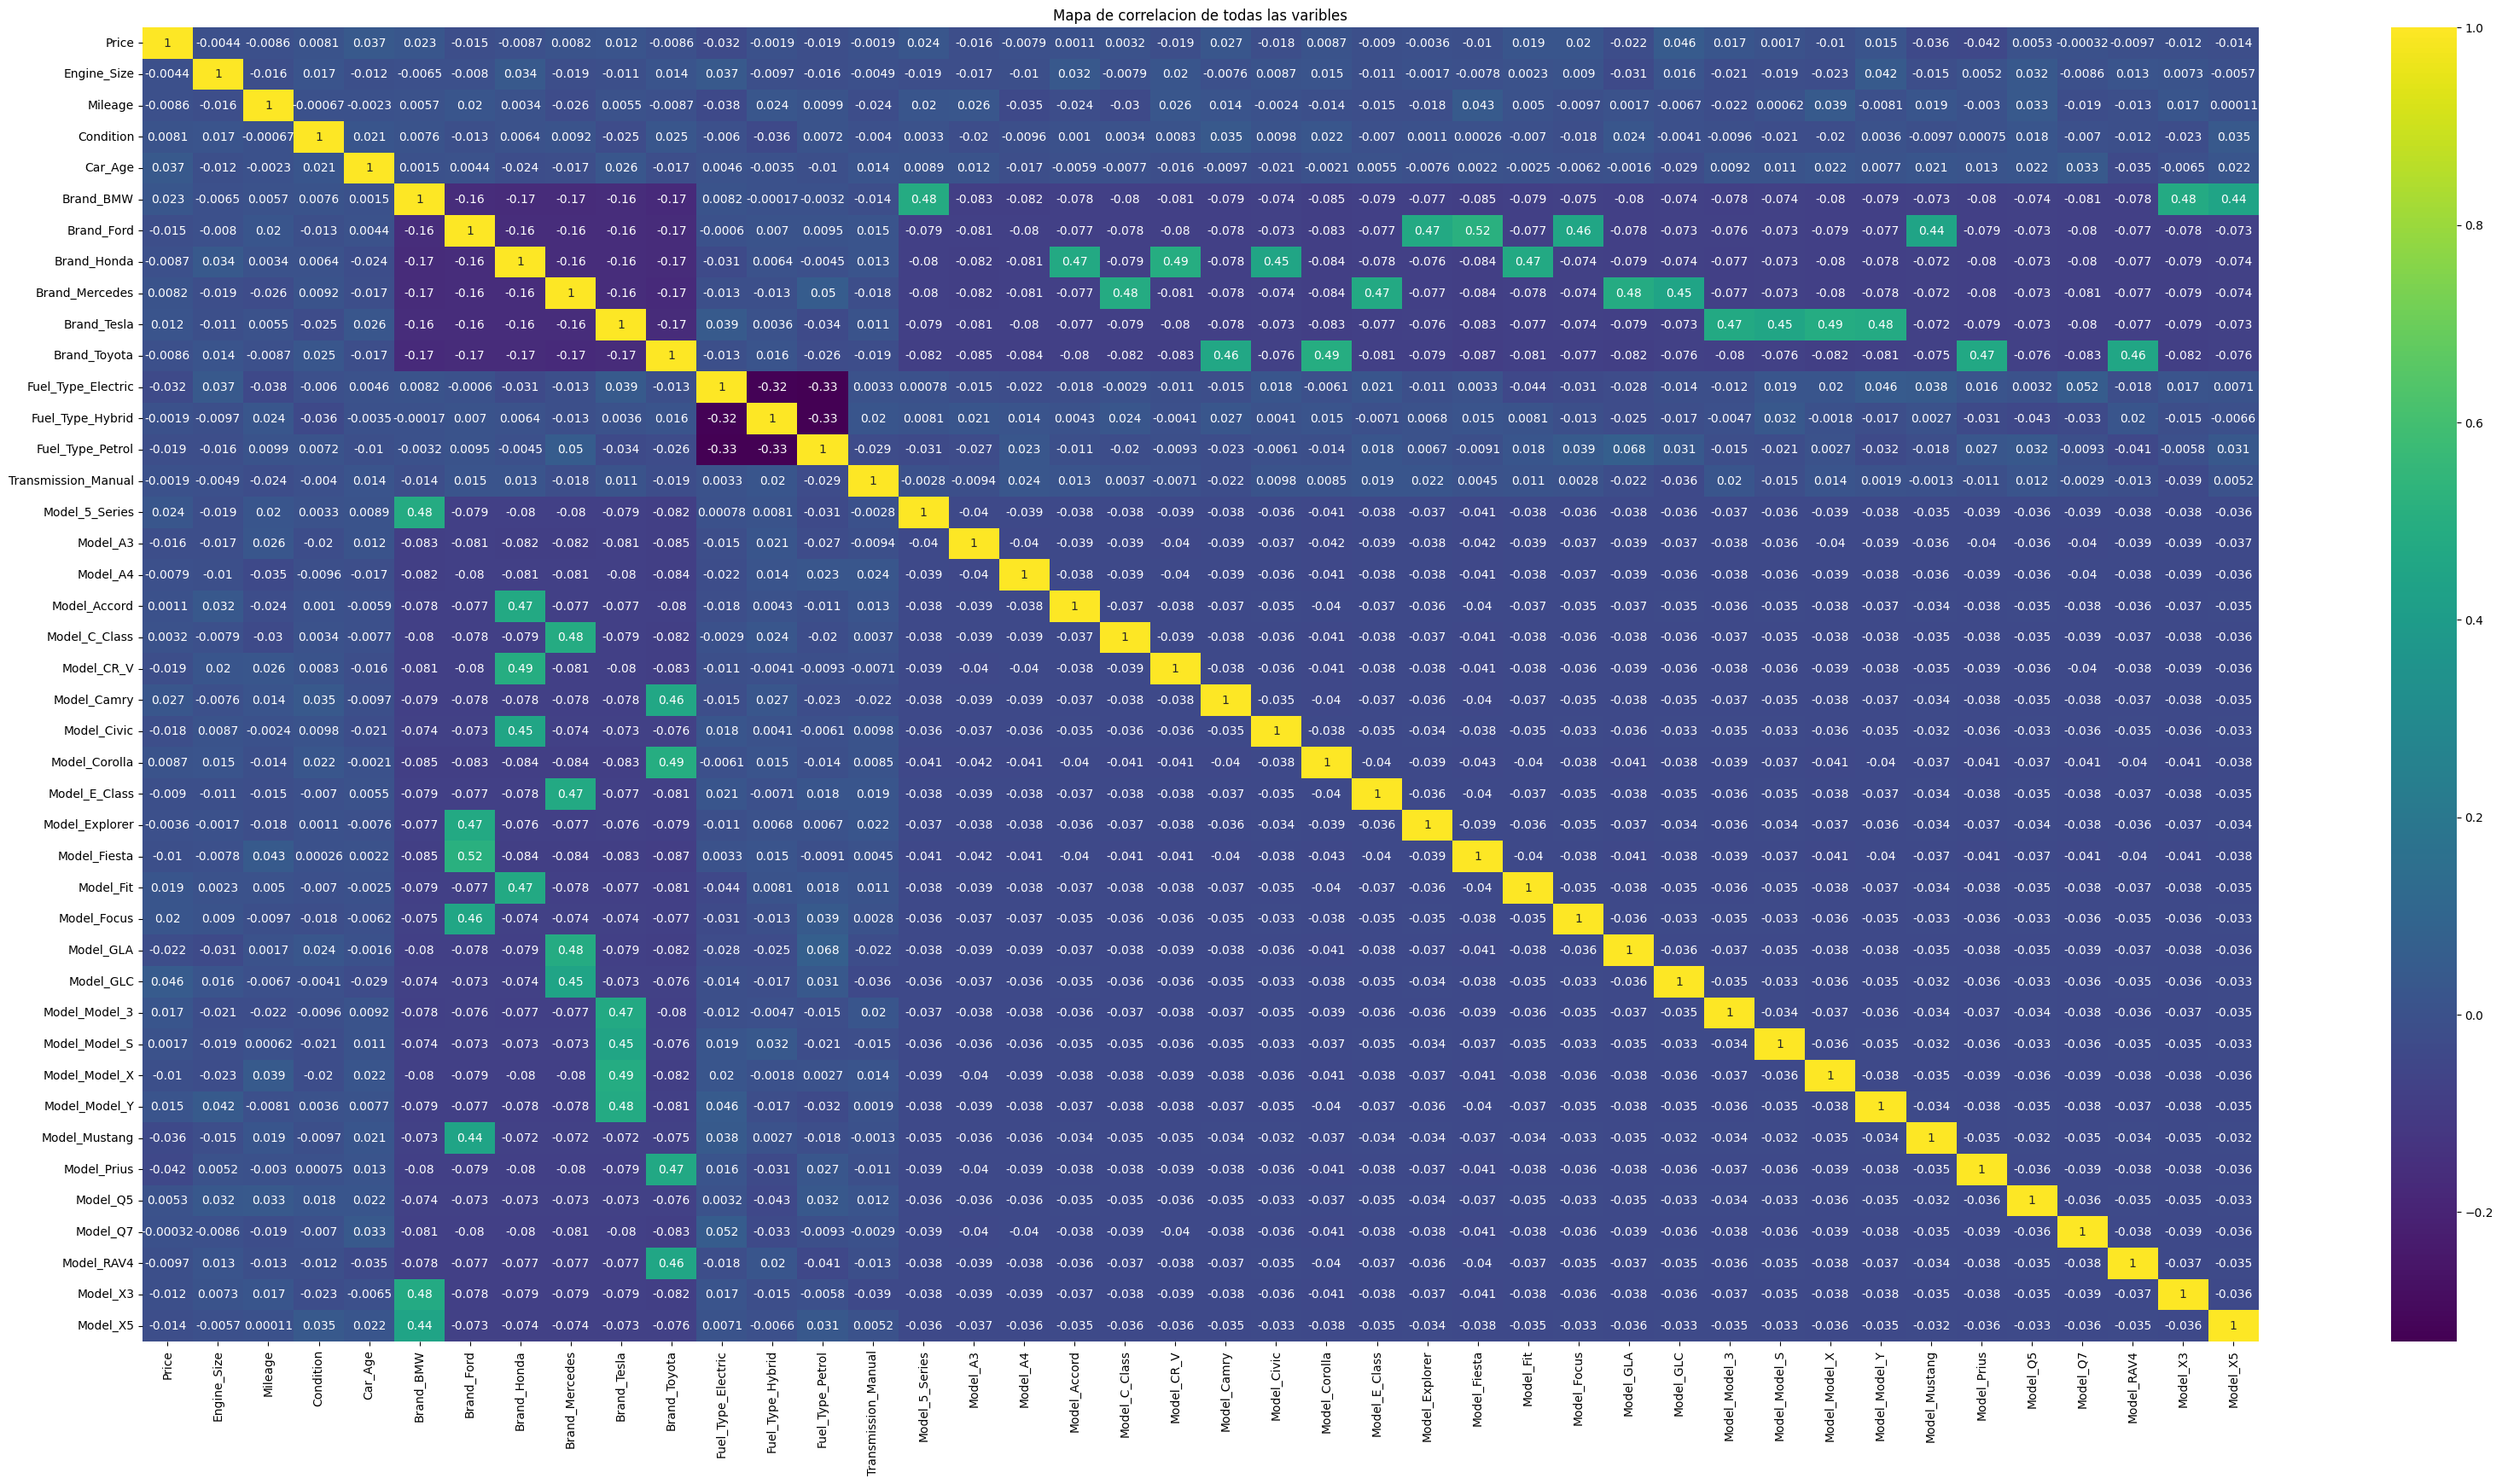

In [42]:
#Mapa de correlacion con todas las variables
plt.figure(figsize=(40, 20))
sns.heatmap(df2.corr(), cmap='viridis',annot=True)
plt.title('Mapa de correlacion de todas las varibles')
plt.show()

# **Tabla de resultados del modelo construido con la interpretación de los resultados de la regresión así como de los elementos de la tabla de summary()**

In [43]:
#Separamos los datos para las varibles independientes (X) y la depediente (Y)
X = df2.drop('Price', axis=1)
Y = df2['Price']

In [44]:
#Corremos el modelo
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(Y,X_constant).fit()

In [45]:
#Revisamos la tabla de resultados de la regresion lineal por ordinary least squares
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.126
Date:                Tue, 10 Jun 2025   Prob (F-statistic):              0.281
Time:                        16:57:04   Log-Likelihood:                -29063.
No. Observations:                2500   AIC:                         5.820e+04
Df Residuals:                    2464   BIC:                         5.841e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 4.84e+04   2

De acuerdo al análisis que nos proporciona el modelo de regresión podemos observar lo siguiente:


1) Los coeficientes de las varibles son absurdos y poco creibles.

2) El estadístico R^2 = 0.016 indica que el modelo no es bueno ya que un R^2 aceptable se encuentre cercano al 70%

3) La probabilidad del estadístico F es del 1.126; indica que el modelo no es bueno. Es decir, la diferencia entre las varianzas de la regresión y los residuos no es significativa.



## Discución de Resultados

Observando nuestro modelo con las variables explicativas obtenemos algunos problemas dado que el precio no tiene una correlacion significativa con las variables independientes, por lo que podemos concluir que es un modelo de regresion sin poder explicativo

**VARIABLES NO REPRESENTATIVAS**

Pienso que a pesar de que tenemos variables interesantes en el modelo como las marcas, modelo de coche, transmision, kilometraje, etc. Esta no toma variables que si pueden ser representables, es decir son datos posiblemente artificiales.

#¿El modelo cumple con los supuestos de regresión?

## 1. Linealidad del modelo:

**Supuesto:**  
La relación entre la variable dependiente `y` y las variables independientes `x` es lineal:  
`y = β₁ + β₂x + ε`

**Análisis:**  
Como se puede observar en las gráficas no se sigue una tendencia diagonal bien definida por lo que no es claro que exista una relación claramente lineal,es decir, el modelo no se está ajustando correctamente a los datos.

❌ **No se cumple.**

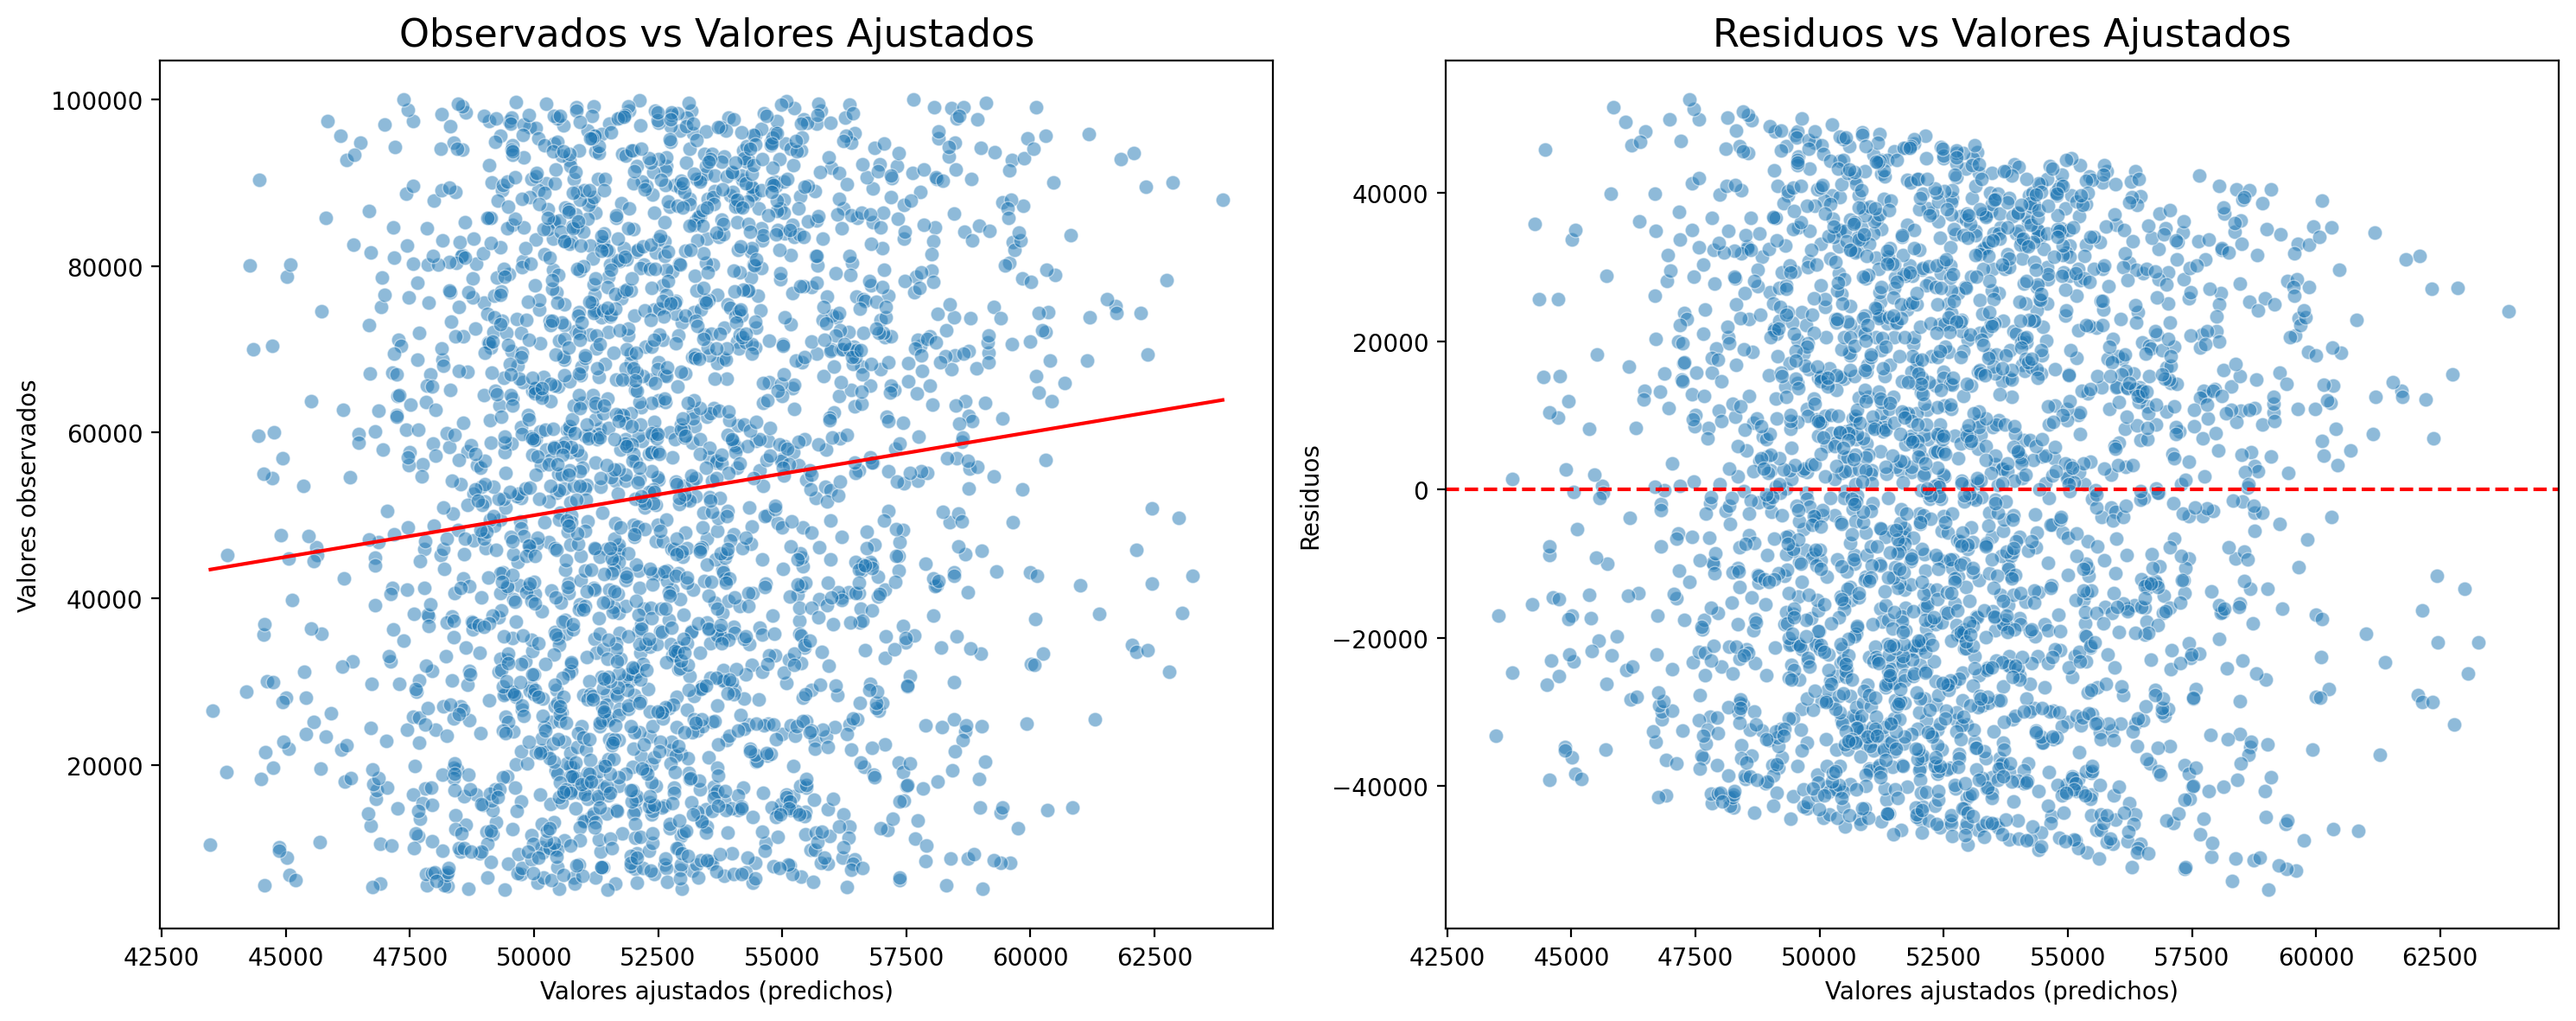

In [46]:
%config InlineBackend.figure_format = 'retina'
df_simple = df2[['Price', 'Engine_Size', 'Mileage', 'Car_Age','Fuel_Type_Electric', 'Transmission_Manual', 'Brand_Toyota']].copy()
y = df_simple['Price']

sns.mpl.rcParams['figure.figsize'] = (15.0, 6.0)

valores_ajustados = lin_reg.fittedvalues
residuales = lin_reg.resid

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Observado vs Ajustado
sns.scatterplot(x=valores_ajustados, y=y, alpha=0.5, ax=axes[0])
sns.lineplot(x=valores_ajustados, y=valores_ajustados, color='red', ax=axes[0])
axes[0].set_title("Observados vs Valores Ajustados", fontsize=16)
axes[0].set_xlabel("Valores ajustados (predichos)")
axes[0].set_ylabel("Valores observados")

# 2. Residuos vs Ajustado
sns.scatterplot(x=valores_ajustados, y=residuales, alpha=0.5, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title("Residuos vs Valores Ajustados", fontsize=16)
axes[1].set_xlabel("Valores ajustados (predichos)")
axes[1].set_ylabel("Residuos")

plt.tight_layout()
plt.show()


##  2. Homocedasticidad (varianza constante del error):

**Supuesto:**  
`Var(ε) = σ² = constante`

**Análisis:**  
Este supuesto se evalúa usualmente con gráficos de residuos o pruebas como Breusch-Pagan o White.  
Aunque no se tienen esas pruebas, el bajo R², errores estándar grandes y coeficientes no significativos sugieren heterocedasticidad.  
❌ **No se cumple.**

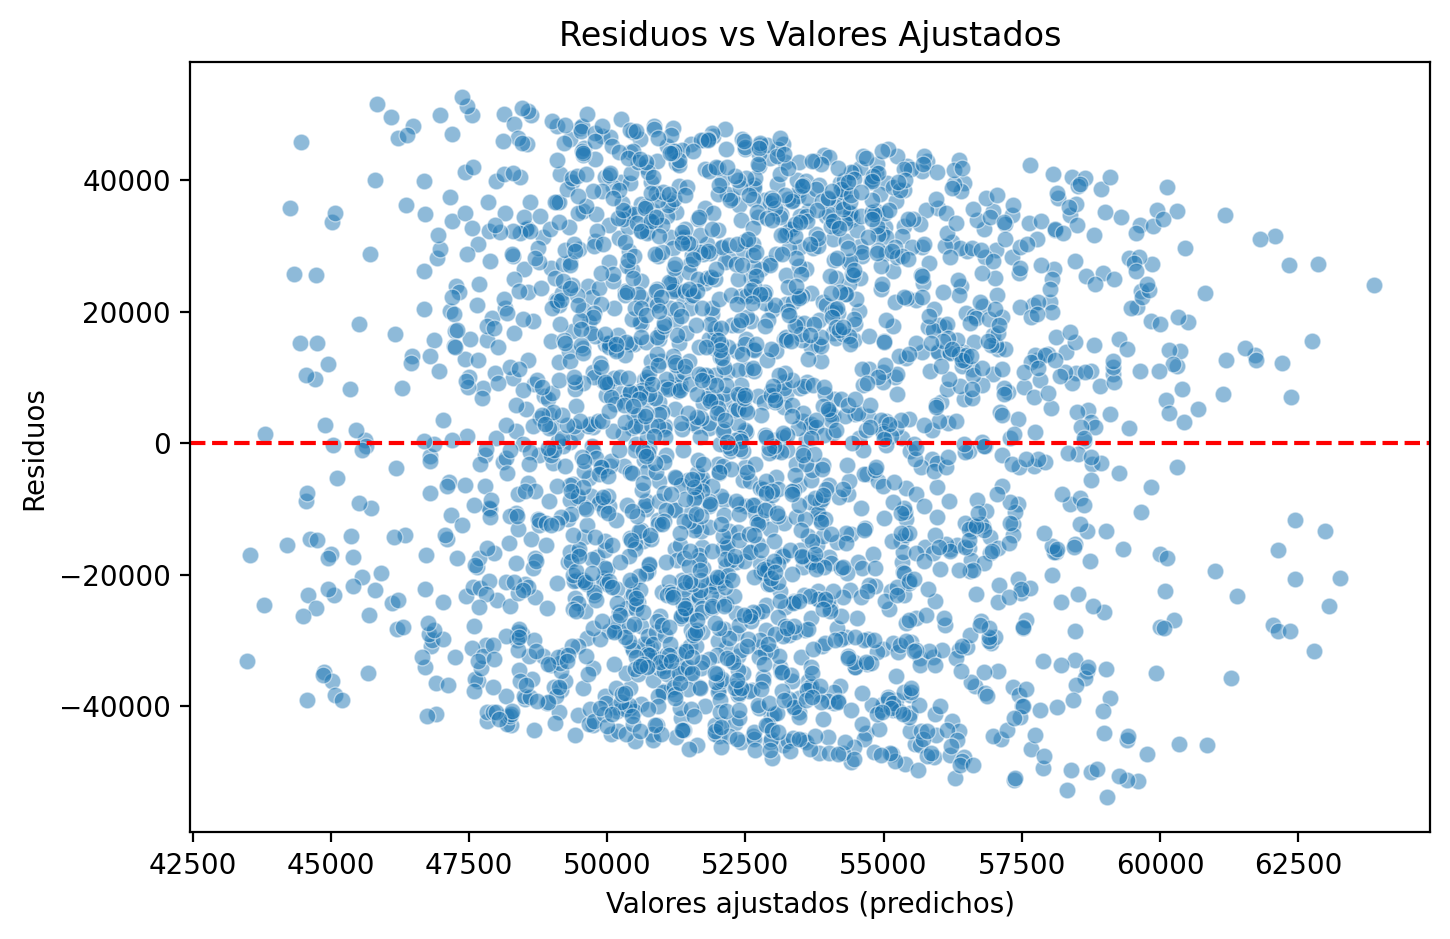

In [47]:
valores_ajustados = lin_reg.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=valores_ajustados, y=residuales, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Valores Ajustados")
plt.xlabel("Valores ajustados (predichos)")
plt.ylabel("Residuos")
plt.show()


##  3. Independencia de los errores:

**Supuesto:**  
`Cov(εᵢ, εⱼ) = 0` para `i ≠ j`

**Análisis:**  
La prueba más directa es el estadístico Durbin-Watson = 1.997, practicamente de 2, lo que indica ausencia de autocorrelación.  
✅ **Se cumple.**

##  4. Normalidad del error:
**Supuesto:**  
`ε ~ N(0, σ²)`

**Análisis:**  
El estadístico de Jarque-Bera = 141.661 y p-valor ≈ 0 indica que se rechaza la hipótesis de normalidad.
Además podemos ver que los errores solo siguen la tendencia de la diagonal en un tramo  
❌ **No se cumple.**


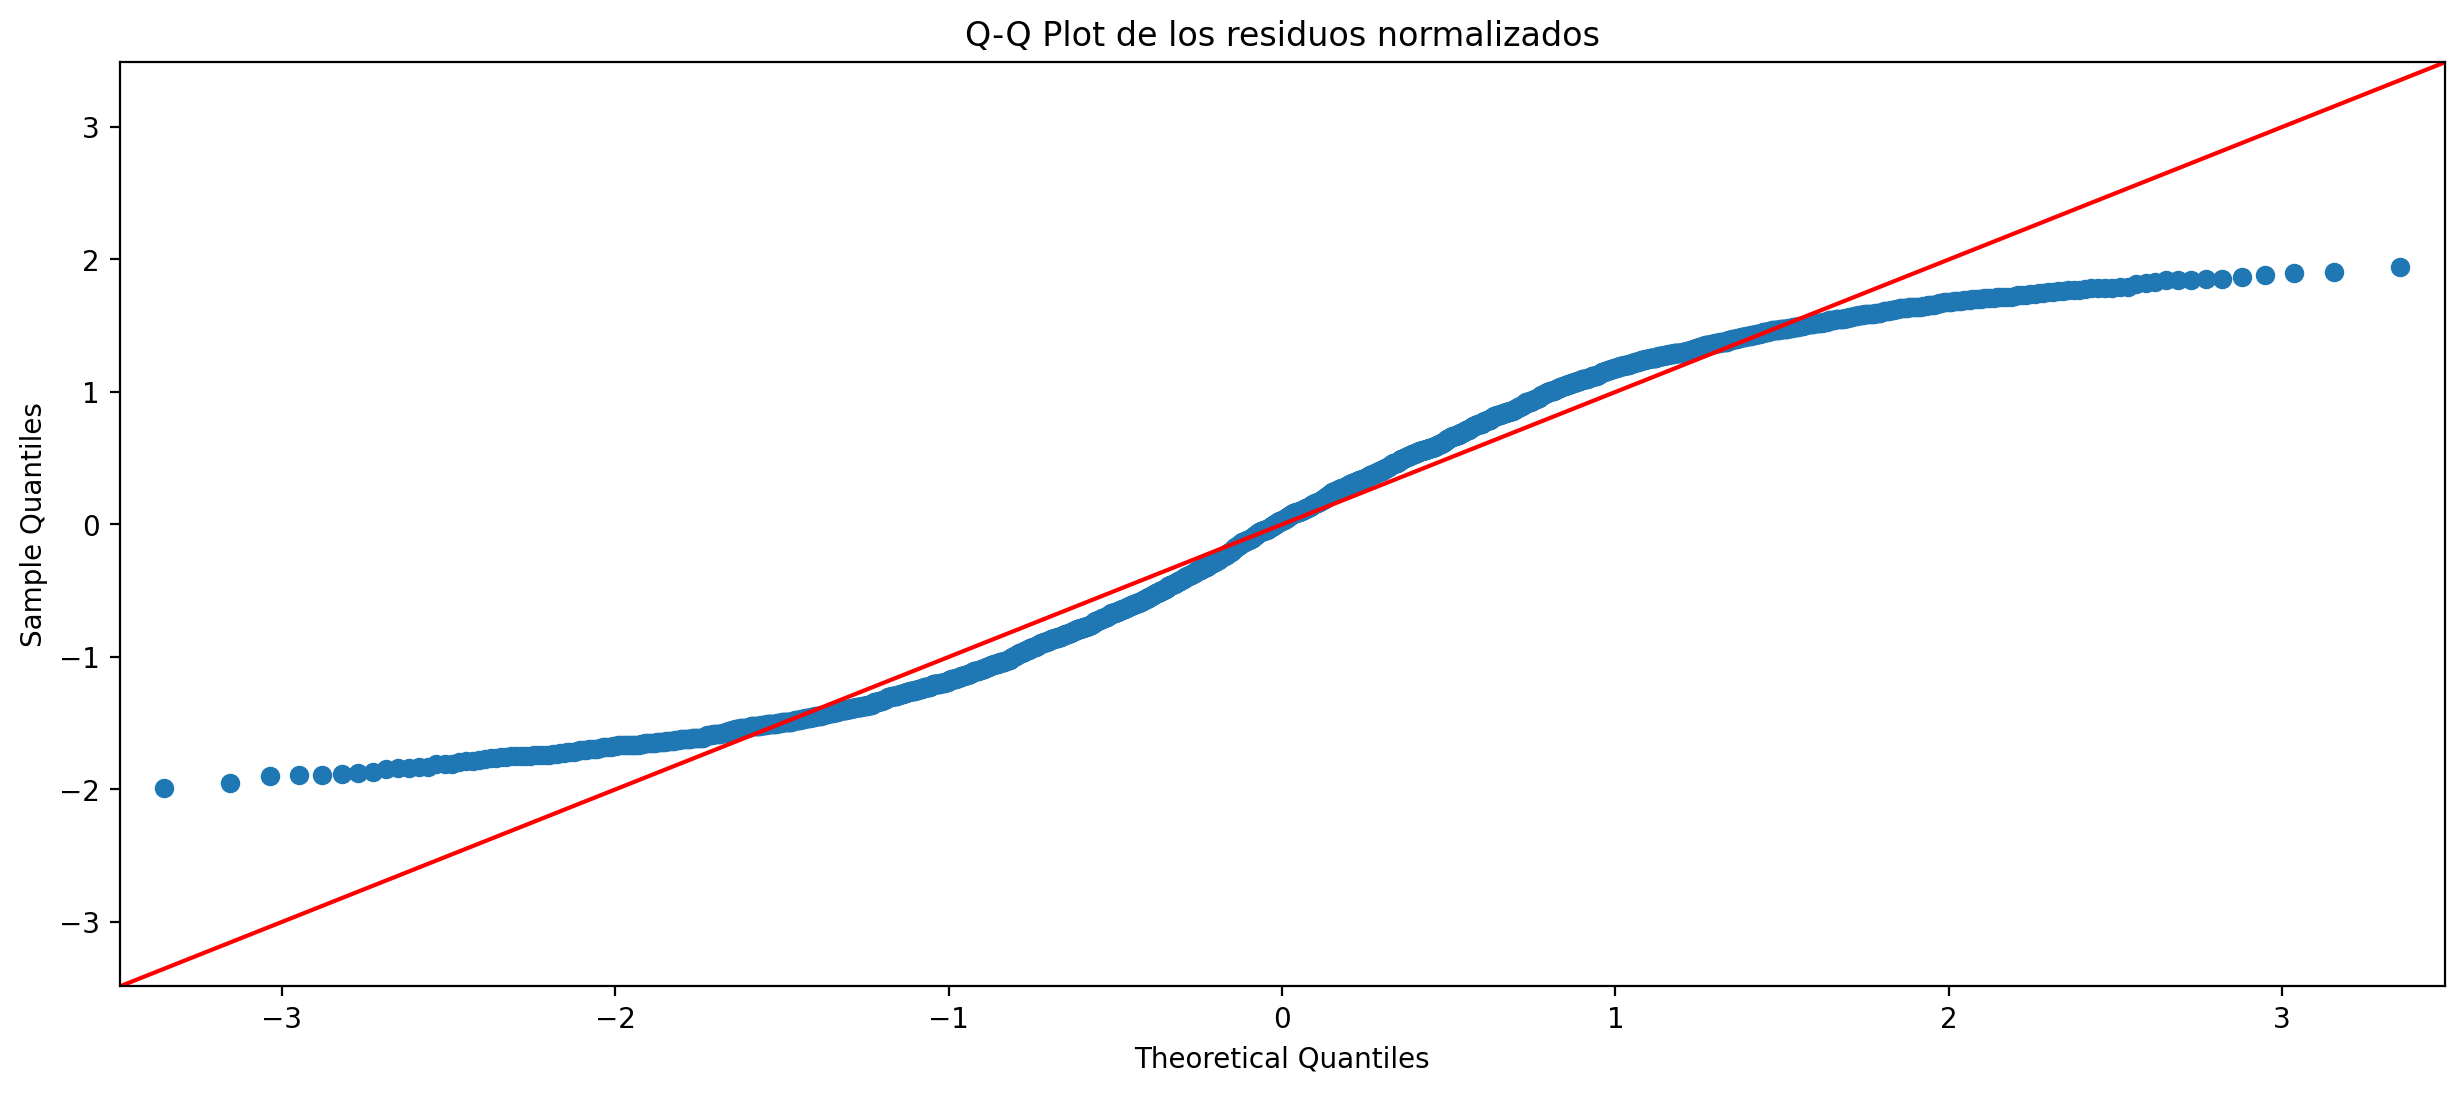

In [48]:
# Normalizar los residuos
resid_norm = (lin_reg.resid - lin_reg.resid.mean()) / lin_reg.resid.std()

# Graficar el Q-Q plot con residuos normalizados
sm.qqplot(resid_norm, line='45')
plt.title("Q-Q Plot de los residuos normalizados")
plt.show()

## 5. Multicolinealidad:

**Nota adicional:**  
El mensaje `"The smallest eigenvalue is 5.12e-28..."` sugiere que hay multicolinealidad severa entre algunas variables explicativas (probablemente dummies de marca y modelo).

Esto viola el supuesto de independencia entre regresores, genera errores estándar grandes, coeficientes inestables y resultados poco confiables.  
❌ **No se cumple.**

---

### **Resumen de cumplimiento de supuestos:**

| Supuesto                                               | ¿Se cumple? |
|--------------------------------------------------------|-------------|
| 1. Linealidad del modelo                               | ❌ No        |
| 2. Homocedasticidad                                     | ❌ No        |
| 3. Independencia de los errore                          | ✅ Sí        |
| 4. Normalidad de los errores                            | ❌ No        |
| 5. No multicolinealidad entre regresores                |❌ No         |


# Conclusión

Como podemos observar, apesar de haber hecho un trabajo arduo y bien fundamentado podemos concluir que al tener problemas con el cumplimiento de los supuestos de Regresion Lineal y que al tratar con multiples varibles dummies da sierios problemas en interpretar la correlacion, ademas de variables irrelevantes para buscar la solucion optima. Hacer un modelo de Regresion lineal **no es lo indicado** por lo que se sugiere optar por otro tipo de modelo que con estas variables se puedan acercar a un mejor resultado

Y si al intentar otro tipo de modelo tampoco obtenemos un pronostico óptimo tambien es posible cuestionarnos si las variables contenidas en el dataset pueden ser no suficientes para explicar este fenomeno tan complejo que pueda tener mas aristas que desconocemos.